###### Credit : Jose Portilla, Pierian Data www.pieriantraining.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
train = pd.read_csv('titanic_passengers.csv')

In [3]:
train.head()      # SibSp : Siblings/Spouses on board, Parch : Parent/Children on board

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


## EDA

In [5]:
sns.set_style('whitegrid')

##### Survived passengers count by gender

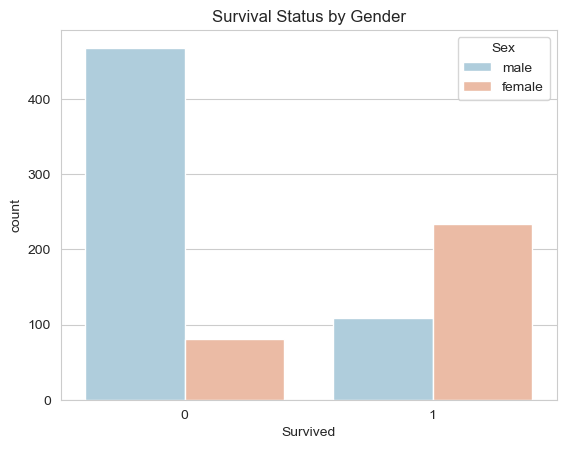

In [7]:
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette = 'RdBu_r')

plt.title('Survival Status by Gender')
plt.show()

##### Survival Status by Ticket Class

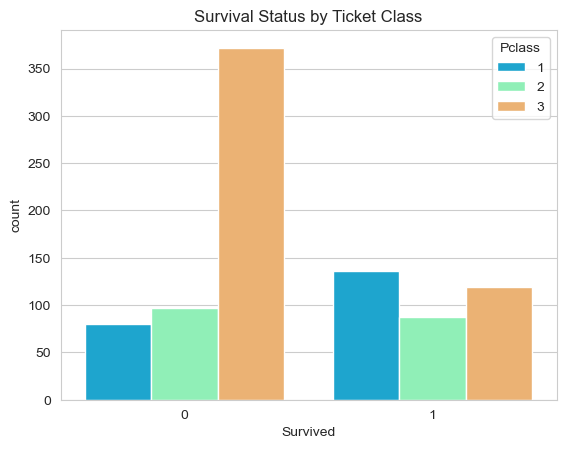

In [8]:
sns.countplot(x = 'Survived', data = train, hue = 'Pclass', palette = 'rainbow')

plt.title('Survival Status by Ticket Class')
plt.show()

##### Passengers Age Distribution

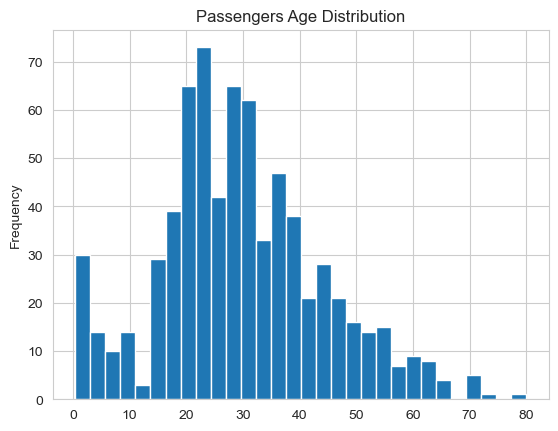

In [9]:
train['Age'].plot.hist(bins = 30)

plt.title('Passengers Age Distribution')
plt.show()

##### Passengers with Siblings or Spouses

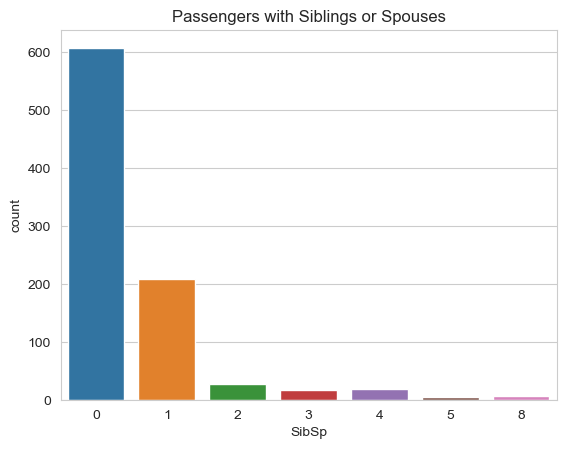

In [10]:
sns.countplot(x = 'SibSp', data = train)

plt.title('Passengers with Siblings or Spouses')
plt.show()

##### Ticket Fare Range

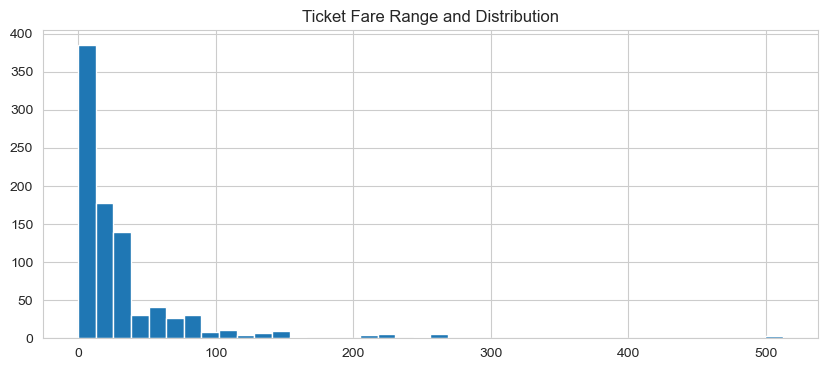

In [11]:
train['Fare'].hist(bins = 40, figsize = (10, 4))

plt.title('Ticket Fare Range and Distribution')
plt.show()

In [12]:
import cufflinks as cf

In [13]:
cf.go_offline()

In [14]:
train['Fare'].iplot(kind = 'hist', bins = 50)

## Data Preprocessing

##### Null Values - Age column

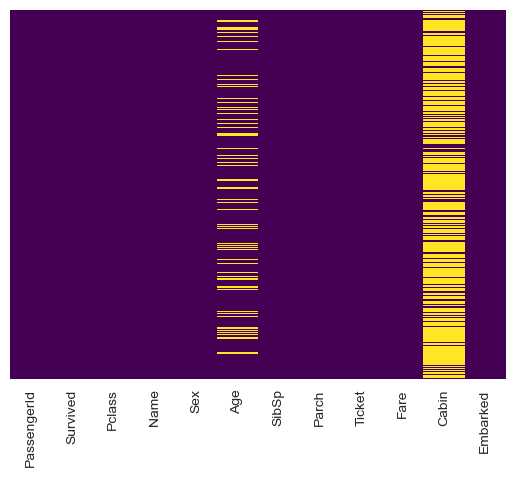

In [15]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

plt.show()

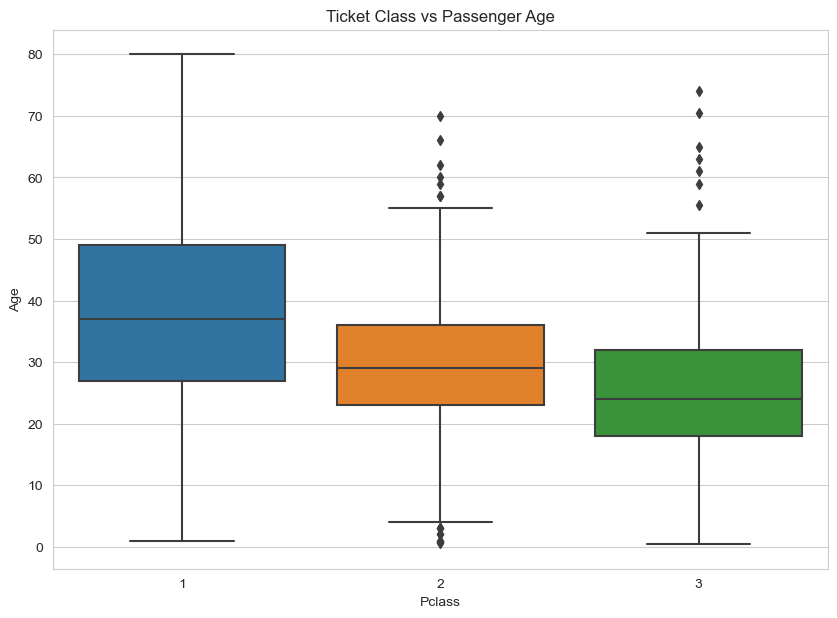

In [20]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)

plt.title('Ticket Class vs Passenger Age')
plt.show()

In [21]:
# Wealthier(higher class) passengers are tend to be a bit older than the 3rd class passengers
# Use the mean age values in order to impute the age to null values of age column

In [22]:
train['Age'].groupby(train['Pclass']).mean()    # To get the mean by classes, but for simplicity we will use below values

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [23]:
def impute_age(cols) :
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age) :
        if Pclass == 1 :
            return 37
        elif Pclass == 2 :
            return 29
        else :
            return 24
    else :
        return Age

In [24]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis = 1)

##### Null Values - Cabin Column

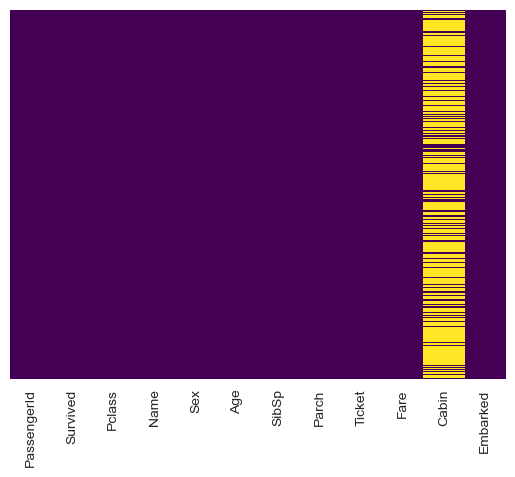

In [25]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

plt.show()

In [26]:
# For Cabin column there is so many missing information, it is better to drop the column altogether

In [27]:
train.drop('Cabin', axis = 1, inplace = True)

In [28]:
train.dropna(inplace = True)

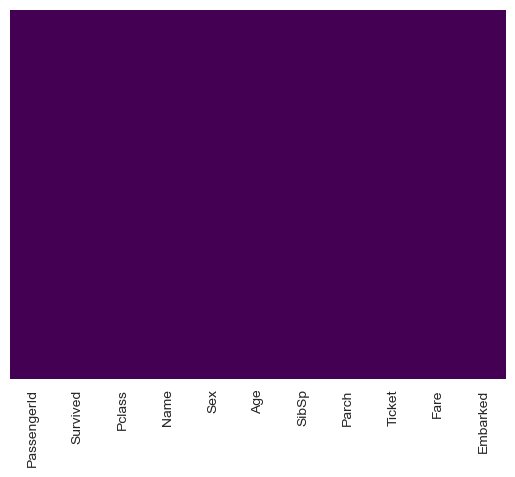

In [29]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')     # No more missing values

plt.show()

##### Encoding Categorical Columns - Sex, Embarked columns

In [30]:
sex = pd.get_dummies(train['Sex'], drop_first = True, dtype = float)

In [31]:
sex.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [32]:
embark = pd.get_dummies(train['Embarked'], drop_first = True, dtype = float)

In [33]:
embark.head()

,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [34]:
train = pd.concat([train, sex, embark], axis = 1)

In [35]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)

##### Dropping unnecessary column

In [36]:
train.drop('PassengerId', axis = 1, inplace = True)

##### Encoding Categorical Columns - PClass Column

In [37]:
Class = pd.get_dummies(train['Pclass'], drop_first = True, dtype = float)

In [38]:
Class.columns = ['C2', 'C3']

In [39]:
train = pd.concat([train, Class], axis = 1)
train.columns = train.columns.astype(str)

## Logistic Regression

##### Set Split

In [40]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

##### Model

In [42]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

##### Prediction

In [43]:
predictions = logmodel.predict(X_test)

##### Evaluation

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [45]:
print(classification_report(y_test, predictions))
print('\n')
print(confusion_matrix(y_test, predictions))
accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



[[149  14]
 [ 33  71]]


0.8239700374531835